# 1.Подготовительные операции
## 1.1.Инициализация

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import matplotlib.colors as clr
import extrafuncs as extra

In [16]:
# Графики непосредственно в ноутбуке
%matplotlib inline

In [17]:
# Настройка параметров шрифта
# и настройка LaTex для вставки в заголовки на графике

fontName = "Liberation Serif"    # Название шрифта
rcParams["mathtext.fontset"] = "custom" # Пользовательские параметры графика
rcParams["mathtext.rm"] = fontName  # Обычный стиль
rcParams["mathtext.bf"] = "{}:bold".format(fontName)    # Жирный
rcParams["mathtext.it"] = "{}:italic".format(fontName)  # Курсив
fontSize=10 # Размер шрифта графиков
fontType='' # Тип шрифта графиков

In [18]:
# Параметры графика

PIC_SIZE = (10, 6)  # Размер графика
PIC_DENSITY = 80    # Плотность пикселей графика
# Цвет графиков
tColor = "#0000FF"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
fColor="#FF6600"; # Цвет графиков в частотной области
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности

## 1.2 Формирование значений основных параметров

In [19]:
# Параметры области определения функций
nMax=300 # Количество отсчетов по каждой полуоси
nScale=.1 # Коэффициент масштабирования

# Время запуска текста в видео, с
startText0=5
startText1=10
frameRate=25 # Частота кадрирования
videoDuration=15 # Длительность видео
fCount=frameRate*videoDuration # Количество кадров

# 2. Моделирование комплексных сигналов
## 2.1. Графическое изображение функции f(z)=z

In [20]:
# Формирование изображения комплексной функции
# f(z)=z
z = extra.getComplexDomain(nMax, nScale) # Область определения
f = z; # Формирование значений
# Формирование изображения HSV
hsv1 = np.zeros(shape=(2*nMax, 2*nMax, 3))
hsv1[:,:,0] = extra.wrapTo2Pi(np.angle(f))/(2*np.pi) # Тон
hsv1[:,:,1] = 1 # Насыщенность
hsv1[:,:,2] = np.divide(np.abs(f), np.max(np.abs(f))) # Яркость
rgb1 = clr.hsv_to_rgb(hsv1) # Преобразование в формат RGB

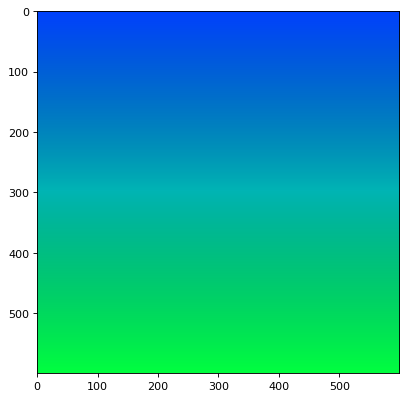

In [21]:
fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.imshow(rgb1); # Визуализация